In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Import json data from flask app pulling from SQL database
json_url = 'http://127.0.0.1:5000/cardiovascular_data'

cvd_df = pd.read_json(json_url)
cvd_df.head()

,active,age,age_years,alco,ap_hi,ap_lo,bmi,bp_category,bp_category_encoded,cardio,cholesterol,gender,gluc,height,id,smoke,weight
0,1,18393,50,0,110,80,21.97,Hypertension Stage 1,Hypertension Stage 1,0,1,2,1,168,0,0,62
1,1,20228,55,0,140,90,34.93,Hypertension Stage 2,Hypertension Stage 2,1,3,1,1,156,1,0,85
2,0,18857,51,0,130,70,23.51,Hypertension Stage 1,Hypertension Stage 1,1,3,1,1,165,2,0,64
3,1,17623,48,0,150,100,28.71,Hypertension Stage 2,Hypertension Stage 2,1,1,2,1,169,3,0,82
4,0,17474,47,0,100,60,23.01,Normal,Normal,0,1,1,1,156,4,0,56


In [4]:
# Dropped age and bp_category_encoded files. Age is just age in days, kept age in years, bp_category_encoded files
# repeats of bp_category column
cvd_df = cvd_df.drop(columns=['age','bp_category_encoded'])
cvd_df

,active,age_years,alco,ap_hi,ap_lo,bmi,bp_category,cardio,cholesterol,gender,gluc,height,id,smoke,weight
0,1,50,0,110,80,21.97,Hypertension Stage 1,0,1,2,1,168,0,0,62
1,1,55,0,140,90,34.93,Hypertension Stage 2,1,3,1,1,156,1,0,85
2,0,51,0,130,70,23.51,Hypertension Stage 1,1,3,1,1,165,2,0,64
3,1,48,0,150,100,28.71,Hypertension Stage 2,1,1,2,1,169,3,0,82
4,0,47,0,100,60,23.01,Normal,0,1,1,1,156,4,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,57,0,110,70,21.23,Normal,0,1,1,1,158,129,0,53
96,1,52,0,110,70,23.88,Normal,0,1,2,1,165,131,0,65
97,0,50,0,150,110,36.36,Hypertension Stage 2,1,1,1,1,165,132,0,99
98,0,59,0,120,80,34.60,Hypertension Stage 1,1,1,2,1,170,133,0,100


In [5]:
cvd_df.describe()

,active,age_years,alco,ap_hi,ap_lo,bmi,cardio,cholesterol,gender,gluc,height,id,smoke,weight
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.740000,53.150000,0.030000,128.880000,82.240000,28.043600,0.510000,1.360000,1.380000,1.200000,164.370000,67.230000,0.060000,75.780000
std,0.440844,6.569558,0.171447,16.954651,10.849866,5.408456,0.502418,0.703814,0.487832,0.550482,8.397516,38.903884,0.238683,15.275636
min,0.000000,39.000000,0.000000,90.000000,60.000000,18.490000,0.000000,1.000000,1.000000,1.000000,148.000000,0.000000,0.000000,45.000000
25%,0.000000,49.000000,0.000000,120.000000,77.500000,23.880000,0.000000,1.000000,1.000000,1.000000,158.000000,35.750000,0.000000,65.000000
50%,1.000000,53.000000,0.000000,130.000000,80.000000,27.530000,1.000000,1.000000,1.000000,1.000000,164.000000,64.500000,0.000000,74.500000
75%,1.000000,59.000000,0.000000,140.000000,90.000000,30.827500,1.000000,1.000000,2.000000,1.000000,170.000000,103.250000,0.000000,85.000000
max,1.000000,64.000000,1.000000,180.000000,110.000000,47.610000,1.000000,3.000000,2.000000,3.000000,188.000000,134.000000,1.000000,115.000000


In [ ]:
# Check column names and datatypes
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   active       100 non-null    int64  
 1   age_years    100 non-null    int64  
 2   alco         100 non-null    int64  
 3   ap_hi        100 non-null    int64  
 4   ap_lo        100 non-null    int64  
 5   bmi          100 non-null    float64
 6   bp_category  100 non-null    object 
 7   cardio       100 non-null    int64  
 8   cholesterol  100 non-null    int64  
 9   gender       100 non-null    int64  
 10  gluc         100 non-null    int64  
 11  height       100 non-null    int64  
 12  id           100 non-null    int64  
 13  smoke        100 non-null    int64  
 14  weight       100 non-null    int64  
dtypes: float64(1), int64(13), object(1)
memory usage: 11.8+ KB


In [7]:
# Check number of unique values in each column
cvd_df.nunique()

active           2
age_years       23
alco             2
ap_hi           14
ap_lo            8
bmi             87
bp_category      4
cardio           2
cholesterol      3
gender           2
gluc             3
height          31
id             100
smoke            2
weight          50
dtype: int64

In [8]:
# Check for null values in data
cvd_df.isnull().sum()

active         0
age_years      0
alco           0
ap_hi          0
ap_lo          0
bmi            0
bp_category    0
cardio         0
cholesterol    0
gender         0
gluc           0
height         0
id             0
smoke          0
weight         0
dtype: int64

In [9]:
# Check for duplicate data
cvd_df.duplicated().sum()

0

In [10]:
# Check for correlation in the data
cvd_df_corr = pd.get_dummies(cvd_df)
print(cvd_df_corr.corr())

                                    active  age_years      alco     ap_hi  \
active                            1.000000  -0.063128  0.104243  0.183631   
age_years                        -0.063128   1.000000 -0.165461  0.155690   
alco                              0.104243  -0.165461  1.000000 -0.023074   
ap_hi                             0.183631   0.155690 -0.023074  1.000000   
ap_lo                             0.144110   0.061134  0.072112  0.763407   
bmi                              -0.094755   0.167810  0.035068  0.306826   
cardio                            0.011857   0.221412 -0.062151  0.553910   
cholesterol                       0.044275   0.012234 -0.006697  0.354101   
gender                           -0.005636  -0.027421  0.103864  0.098384   
gluc                             -0.033299  -0.094965 -0.064216  0.068615   
height                            0.001692  -0.173126  0.293897  0.088997   
id                                0.008823   0.163246  0.054988  0.210423   

<Axes: >

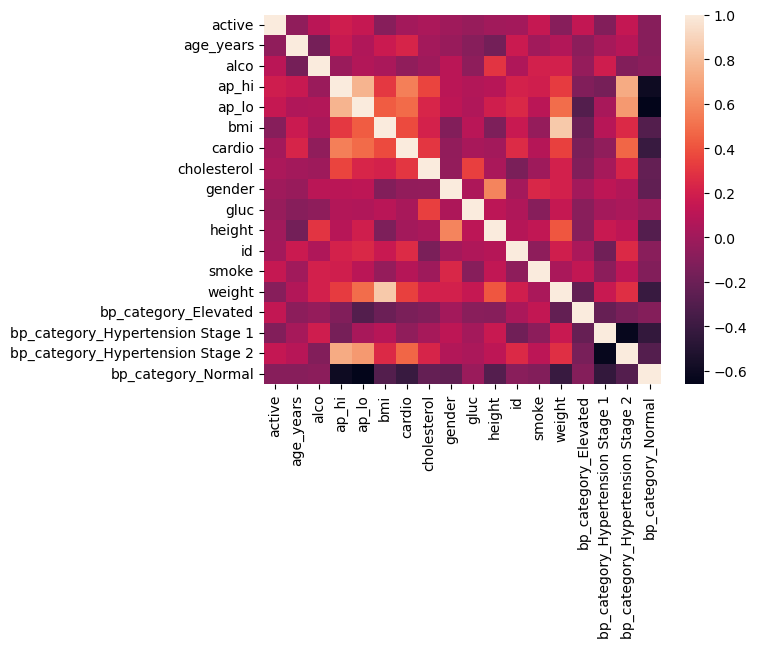

In [ ]:
# Generate heat map of correlation data
sns.heatmap(cvd_df_corr.corr(), annot=False)

In [12]:
# Create correlation matrix
correlation_matrix = cvd_df_corr.corr()
print(correlation_matrix)

                                    active  age_years      alco     ap_hi  \
active                            1.000000  -0.063128  0.104243  0.183631   
age_years                        -0.063128   1.000000 -0.165461  0.155690   
alco                              0.104243  -0.165461  1.000000 -0.023074   
ap_hi                             0.183631   0.155690 -0.023074  1.000000   
ap_lo                             0.144110   0.061134  0.072112  0.763407   
bmi                              -0.094755   0.167810  0.035068  0.306826   
cardio                            0.011857   0.221412 -0.062151  0.553910   
cholesterol                       0.044275   0.012234 -0.006697  0.354101   
gender                           -0.005636  -0.027421  0.103864  0.098384   
gluc                             -0.033299  -0.094965 -0.064216  0.068615   
height                            0.001692  -0.173126  0.293897  0.088997   
id                                0.008823   0.163246  0.054988  0.210423   

In [13]:
# Sort correlation values based on cardio column that will be the target data
target_correlation = correlation_matrix['cardio'].abs().sort_values(ascending=False)
print(target_correlation)

cardio                              1.000000
ap_hi                               0.553910
ap_lo                               0.483188
bp_category_Hypertension Stage 2    0.467080
bp_category_Normal                  0.408459
bmi                                 0.375024
weight                              0.343800
cholesterol                         0.303937
id                                  0.256980
age_years                           0.221412
bp_category_Elevated                0.142266
smoke                               0.079178
alco                                0.062151
bp_category_Hypertension Stage 1    0.059259
gender                              0.056873
gluc                                0.029218
active                              0.011857
height                              0.009888
Name: cardio, dtype: float64


In [84]:
# seperate columns into features and target
X = cvd_df.drop(columns = ['cardio', 'id'])
y = cvd_df['cardio']

In [85]:
# Create dummy columns for features

X = pd.get_dummies(X, dtype='int')

In [86]:
#Display first five rows of feature data
X.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category_Elevated,bp_category_Hypertension Stage 1,bp_category_Hypertension Stage 2,bp_category_Normal
0,2,168,62.0,110,80,1,1,0,0,1,50,21.967120,0,1,0,0
1,1,156,85.0,140,90,3,1,0,0,1,55,34.927679,0,0,1,0
2,1,165,64.0,130,70,3,1,0,0,0,51,23.507805,0,1,0,0
3,2,169,82.0,150,100,1,1,0,0,1,48,28.710479,0,0,1,0
4,1,156,56.0,100,60,1,1,0,0,0,47,23.011177,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,2,168,76.0,120,80,1,1,1,0,1,52,26.927438,0,1,0,0
68201,1,158,126.0,140,90,2,2,0,0,1,61,50.472681,0,0,1,0
68202,2,183,105.0,180,90,3,1,0,1,0,52,31.353579,0,0,1,0
68203,1,163,72.0,135,80,1,2,0,0,0,61,27.099251,0,1,0,0


In [87]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [88]:
X_train.shape

(51153, 16)

In [89]:
X_test.shape

(17052, 16)

In [90]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [91]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim=16))
nn_model.add(tf.keras.layers.Dense(units=100, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

c:\Users\mrybi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 714us/step - accuracy: 0.7166 - loss: 0.5634
Epoch 2/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.7314 - loss: 0.5488
Epoch 3/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.7352 - loss: 0.5447
Epoch 4/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.7327 - loss: 0.5454
Epoch 5/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.7375 - loss: 0.5416
Epoch 6/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - accuracy: 0.7338 - loss: 0.5431
Epoch 7/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.7356 - loss: 0.5390
Epoch 8/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.7362 - loss: 0.5422
Epoch 9/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 0.7391 - loss: 0.5366
Epoch 10/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.7377 - loss: 0.5389
Epoch 11/50
1599/1599 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.7349 - loss: 0.5411
Epoch 12

In [92]:
# Create a Logistic Regression Model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=78)
classifier

LogisticRegression(max_iter=200, random_state=78)

In [93]:
# Train the data
classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=78)

In [94]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7263503606826579
Testing Data Score: 0.7275392915787005


In [95]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,1,0
6,1,1
7,1,1
8,0,0
9,1,0


In [96]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.7275392915787005

In [97]:
# Get the target variables. 
target = cvd_df['cardio']
target_names = ['Cardiovascular Disease', 'Healthy']

In [98]:
# Get the features. 
data = cvd_df.drop(columns= ['cardio', 'id'], axis=1)
data = pd.get_dummies(data, dtype='int')
feature_names = data.columns
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category_Elevated,bp_category_Hypertension Stage 1,bp_category_Hypertension Stage 2,bp_category_Normal
0,2,168,62.0,110,80,1,1,0,0,1,50,21.967120,0,1,0,0
1,1,156,85.0,140,90,3,1,0,0,1,55,34.927679,0,0,1,0
2,1,165,64.0,130,70,3,1,0,0,0,51,23.507805,0,1,0,0
3,2,169,82.0,150,100,1,1,0,0,1,48,28.710479,0,0,1,0
4,1,156,56.0,100,60,1,1,0,0,0,47,23.011177,0,0,0,1


In [99]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [100]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [101]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.724


In [102]:
# Calculate the classification report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

                        precision    recall  f1-score   support

Cardiovascular Disease       0.71      0.78      0.74      8666
               Healthy       0.75      0.66      0.70      8386

              accuracy                           0.72     17052
             macro avg       0.73      0.72      0.72     17052
          weighted avg       0.73      0.72      0.72     17052



In [58]:
# Used cross validation to find the best value for the number of neighbors for the KneighborsClassifier
# Found this method at https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
k_values = [i for i in range (1,31)]
scores = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

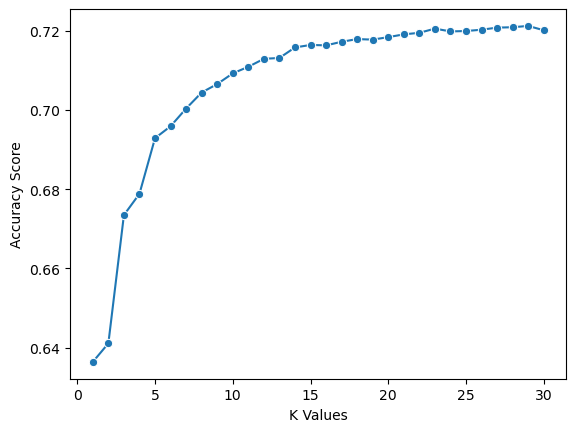

In [59]:
# Plot the values
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [60]:
# Instantiate the KNeighborsClassifier model with n_neighbors = 3 
knn = KNeighborsClassifier(n_neighbors=29)

In [61]:
# Train the model using the training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=29)

In [62]:
# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

In [63]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      8538
           1       0.75      0.66      0.70      8514

    accuracy                           0.72     17052
   macro avg       0.72      0.72      0.72     17052
weighted avg       0.72      0.72      0.72     17052



In [103]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [104]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=700, random_state=78)


In [105]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

C:\Users\mrybi\AppData\Local\Temp\ipykernel_15556\3145931551.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rf_model = rf_model.fit(X_train_scaled, y_train.ravel())


In [106]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [107]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [108]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,6267,2271
Actual 1,2616,5898


Accuracy Score : 0.7134060520760028
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      8538
           1       0.72      0.69      0.71      8514

    accuracy                           0.71     17052
   macro avg       0.71      0.71      0.71     17052
weighted avg       0.71      0.71      0.71     17052

